In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy

In [4]:
def generate_binary_vectors(n):
    binary_vectors = np.array([[int(j) for j in format(i, '0'+str(n)+'b')] for i in range(2**n)])#n차원의 모든 이진벡터 생성
    return binary_vectors   

In [5]:
def title(A):       #plot.title 할떄 사용
    B = []
    for a in A:
        s = '{'
        for i,v in enumerate(a):
            if i != 0:
                s+=','
            s += ''.join(map(str, v))
        s += '}'
        B.append(s)
    return B

In [66]:
P = np.linspace(0, 0.5, 100)
def q_y(p,y,A):
  total=0
  for a in A:
    total+=p_y(p,y,a)
  return np.around(total/A.shape[0],10)
def p_y(p,y,a): 
  sum=1
  for i in range(a.shape[0]):
    if y[i]==a[i]:
      sum*=(1-p)
    else:
      sum*=p
  return sum

In [7]:
rr2=[-1,-1/2,0]
bb2=[0,1/2,1/3]
rr3=[-3/4,-1/2,-1/4,-1/4,-1/8,1/20]
bb3=[-1/4,0,-1/12,1/4,1/8,3/20]
rr4=[-1/2,-3/8,-1/4,-1/4,-3/16,-1/10,-3/20,-1/28,-3/24,-1/12,-3/28,0,0,-1/8,1/18,0,0,0,0,0,0,0,0,0,0,0]
bb4=[-1/4,-1/8,-1/6,0,-1/16,-1/20,0,0,-1/24,0,-1/14,0,1/36,1/8,3/36,0,0,0,0,0,0,0,0,0,0,0]

In [92]:
def tan_line(m,A,co): #접선구하기
    x=sy.Symbol('x')
    total=0
    for a in A:
        sum=1
        for r,s in zip(m,a):
            if r==s:
                sum*=(1-x)
            else:
                sum*=x
        total+=sum
    total/=A.shape[0]
    derivative = total.diff()
    result = derivative.subs(x,0.5)
    plt.plot(P,result*(P-1/2)+1/(2**m.shape[0]),'--',color=co)


In [110]:
def graph(n,A):
    T=generate_binary_vectors(n)    
    for b,a in enumerate(A):
        C=[]
        D=[]
        alpha=0
        beta=1
        plt.figure()
        for i in T:
            y=q_y(P,i,a)
            is_in = any((i == row).all() for row in a)  #i가 a에 속하면 빨간색 선
            if is_in:
                co='red'
            else:
                co='blue'
            plt.plot(P,y,color=co)

            if y[0]==0:   #blue
                if y[50]>alpha:
                    alpha=y[50]
                    C.clear()
                    C.append(i)
                elif y[50]==alpha:
                    C.append(i)
            else:         #red
                if y[50]<beta:
                    beta=y[50]
                    D.clear()
                    D.append(i)
                elif y[50]==beta:
                    D.append(i)
        if len(D)!=0:
            tan_line(D[0],a,'red')
        if len(C)!=0:
            tan_line(C[0],a,'blue')
        D_str = '{' + ','.join([''.join(map(str, arr)) for arr in D[::-1]]) + '}'
        C_str = '{' + ','.join([''.join(map(str, arr)) for arr in C[::-1]]) + '}'
        plt.figtext(0, 0.7, f'Min:{D_str}', ha='right', va='top', fontsize=12, color='red')
        plt.figtext(0, 0.5, f'Max:{C_str}', ha='right', va='top', fontsize=12, color='blue')
        plt.title(f'A={title(A)[b]}')
        plt.xlabel('p')
        plt.ylabel('q')
        plt.show()

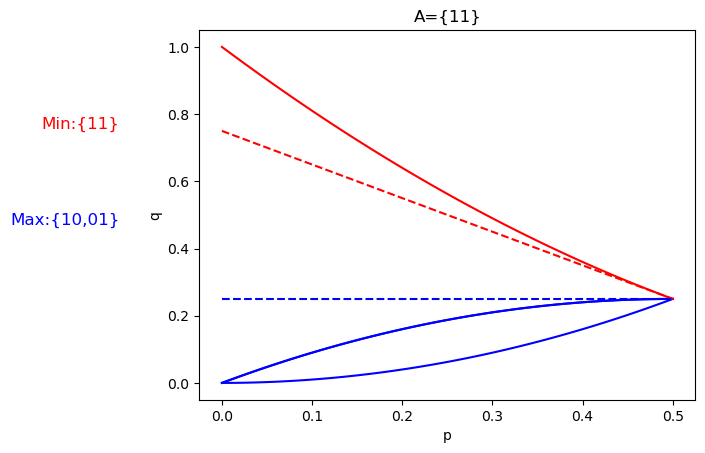

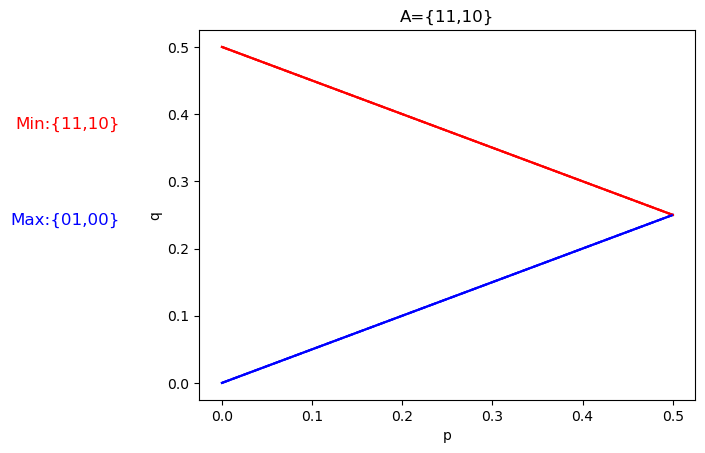

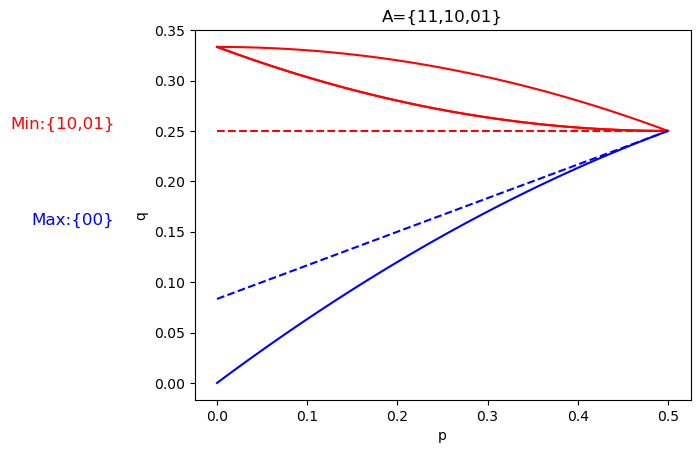

In [111]:
A = [
    np.array([[1,1]]),
    np.array([[1,1],[1,0]]),
    np.array([[1,1],[1,0],[0,1]])
]
graph(2,A)

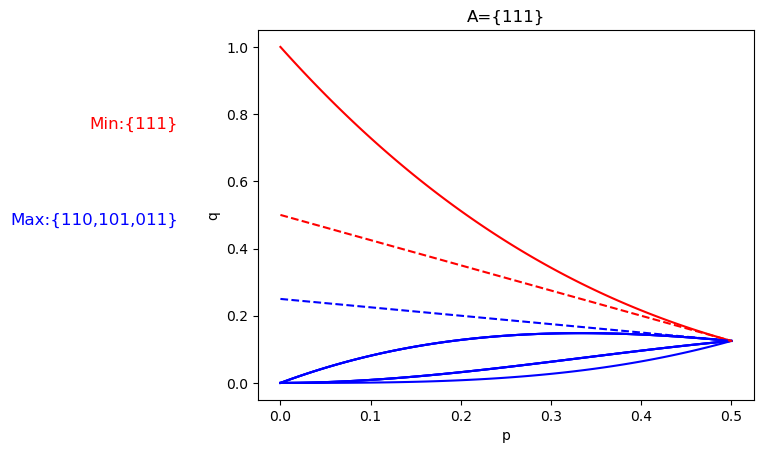

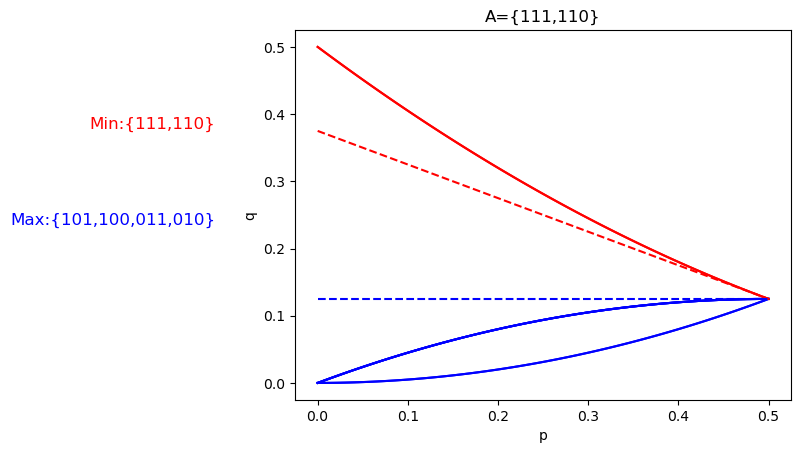

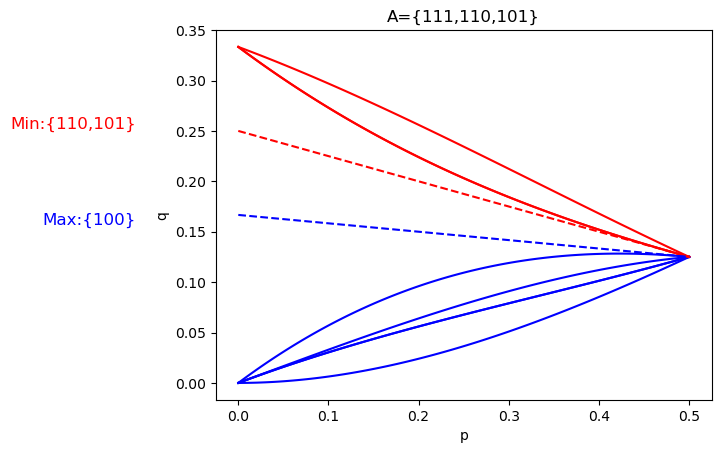

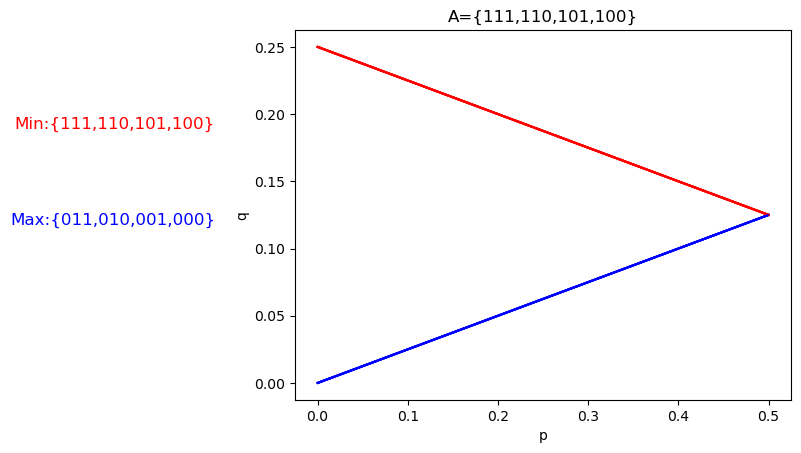

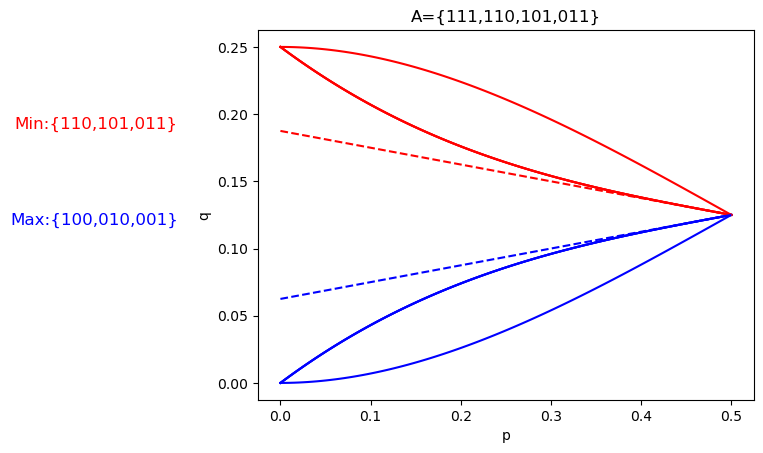

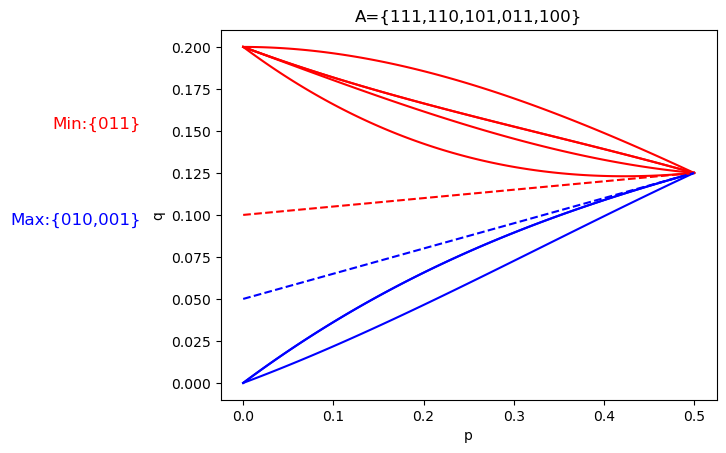

In [112]:
A = [
    np.array([[1,1,1]]),
    np.array([[1,1,1],[1,1,0]]),
    np.array([[1,1,1],[1,1,0],[1,0,1]]),
    np.array([[1,1,1],[1,1,0],[1,0,1],[1,0,0]]),
    np.array([[1,1,1],[1,1,0],[1,0,1],[0,1,1]]),
    np.array([[1,1,1],[1,1,0],[1,0,1],[0,1,1],[1,0,0]]),
]

graph(3,A)

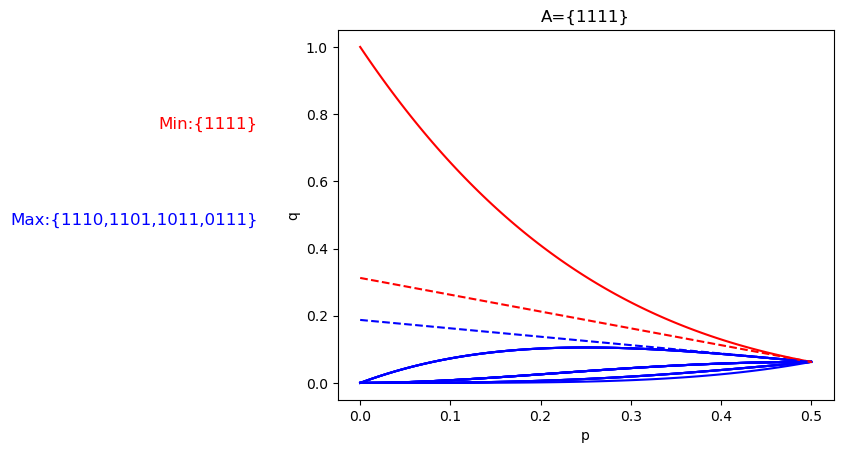

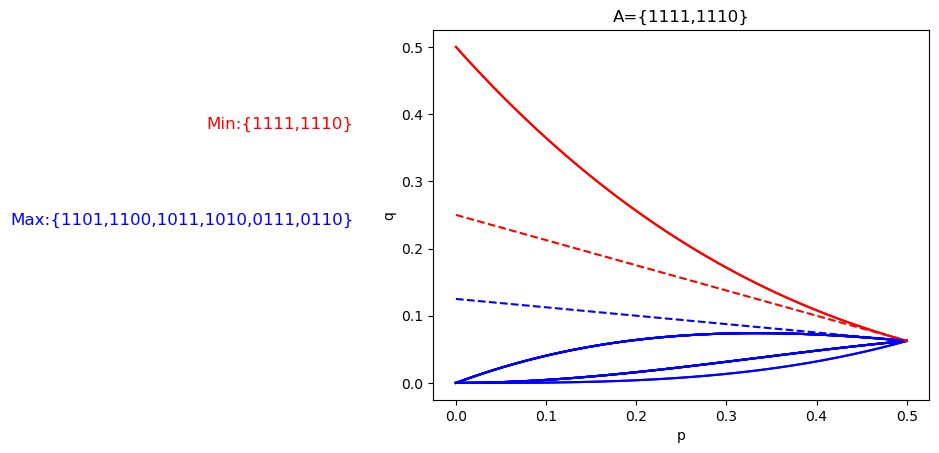

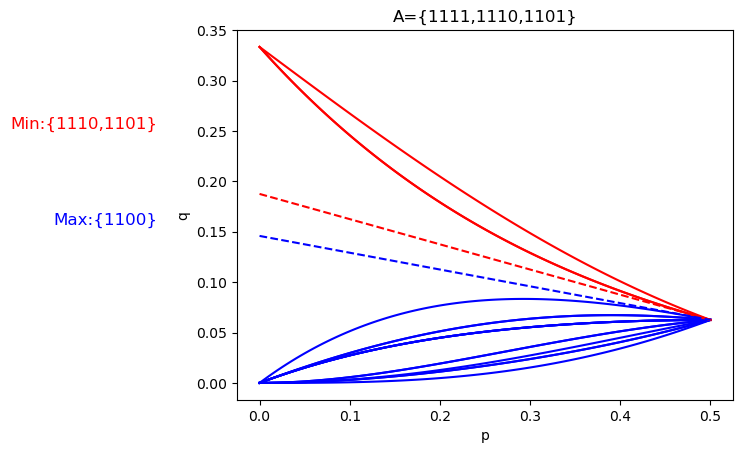

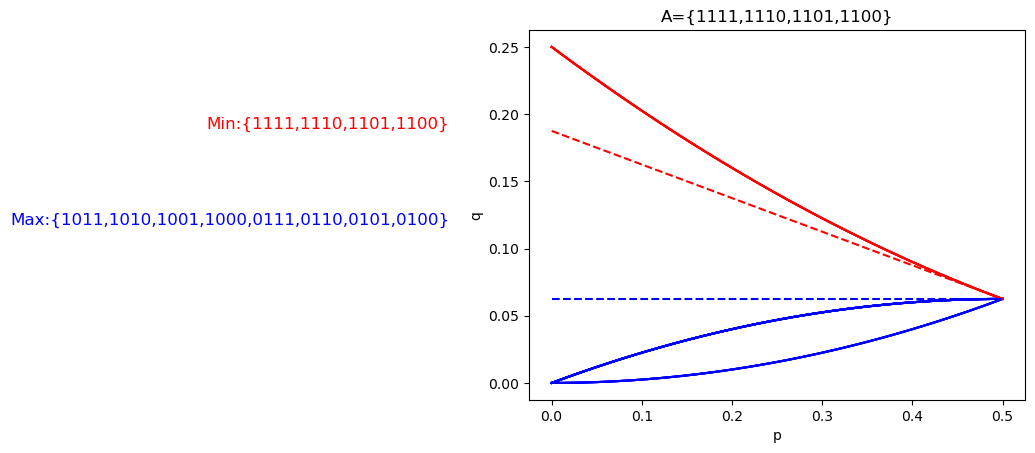

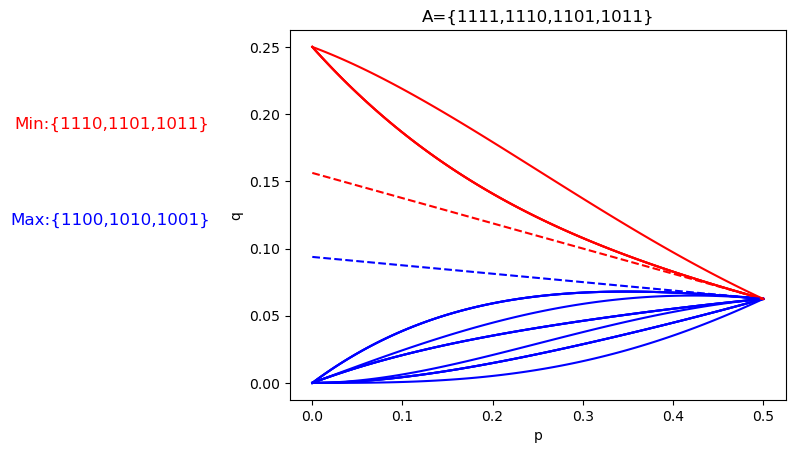

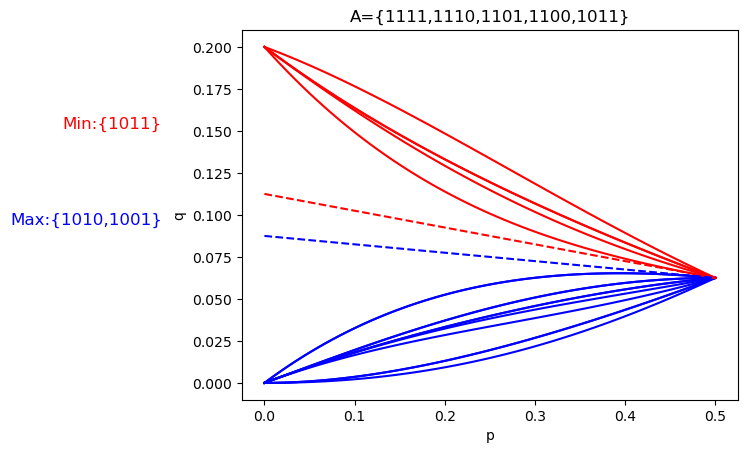

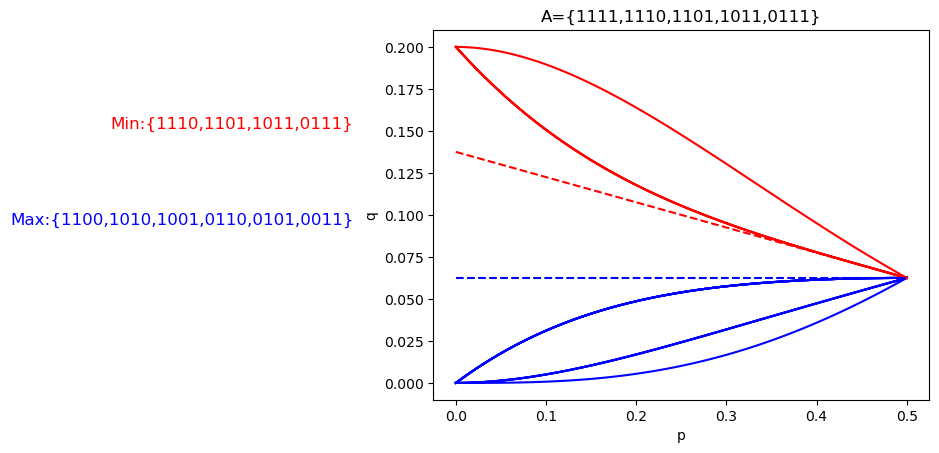

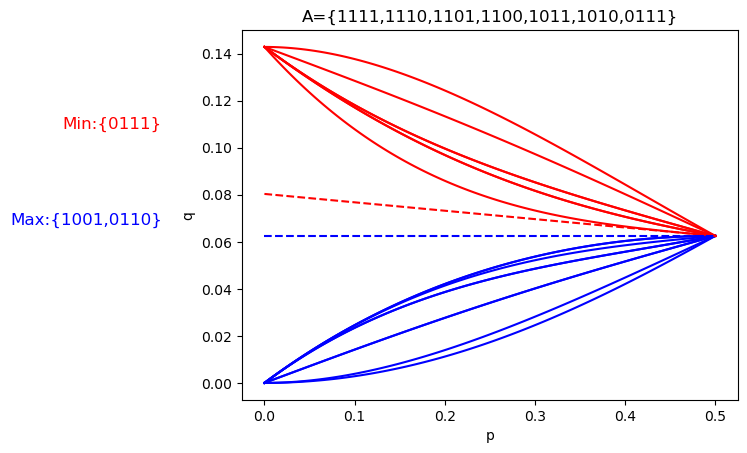

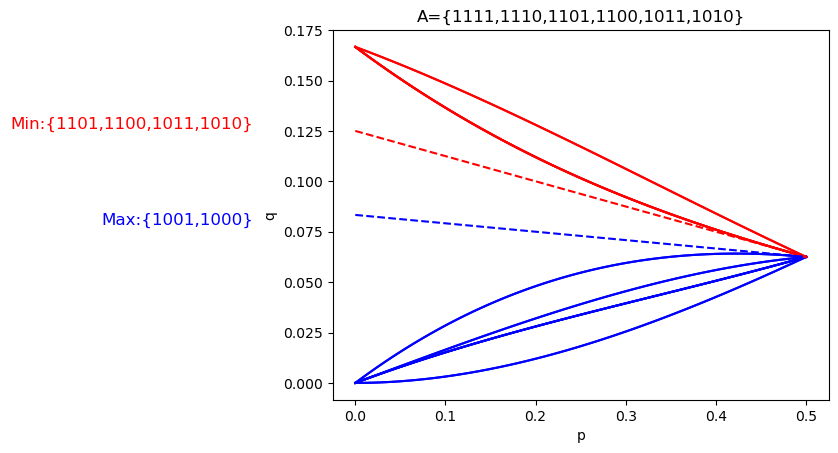

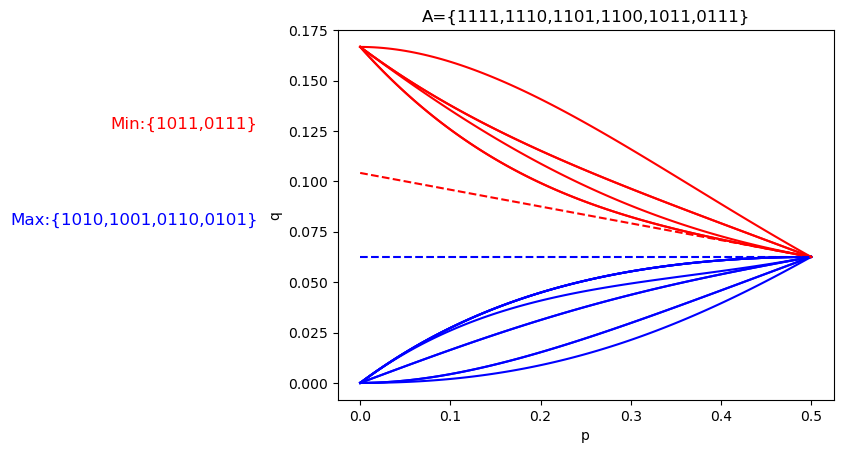

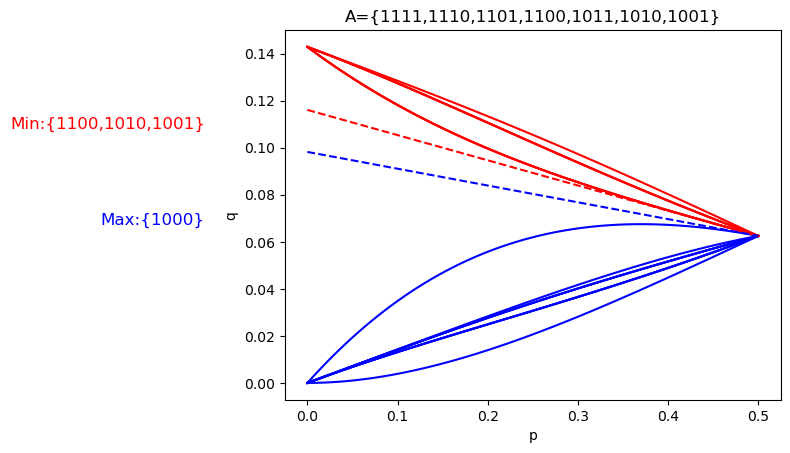

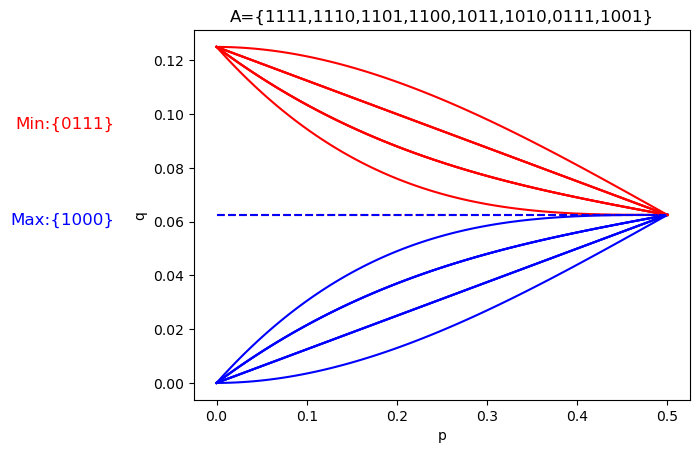

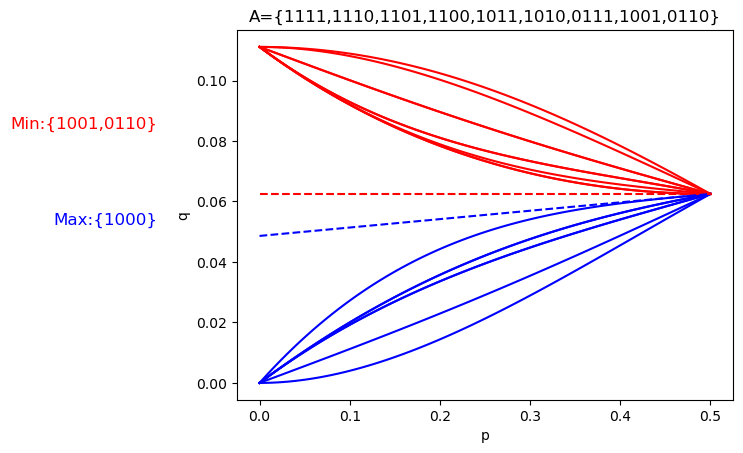

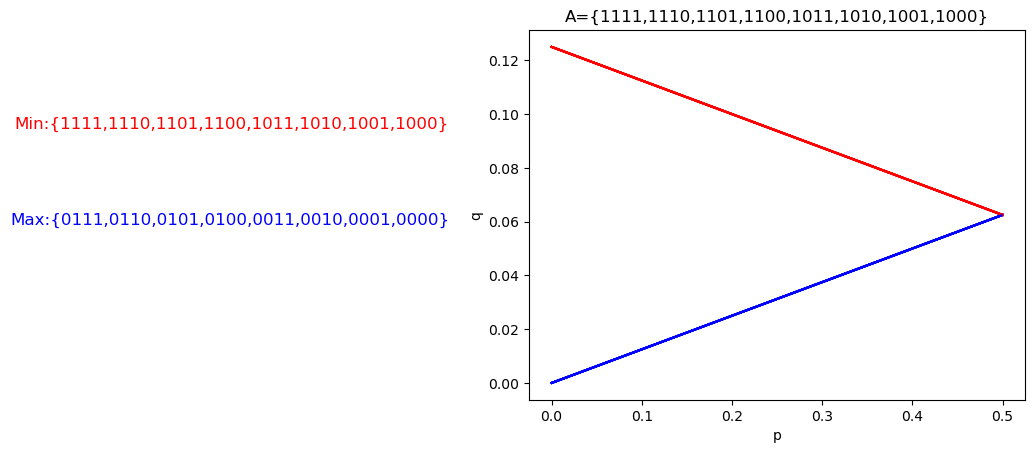

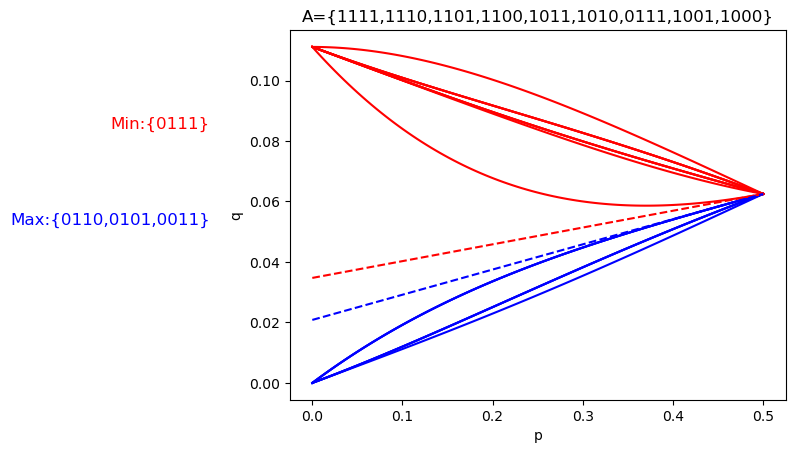

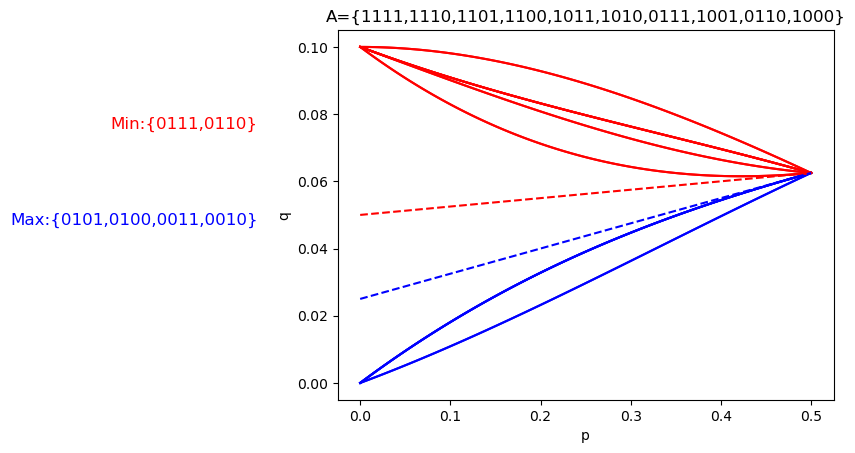

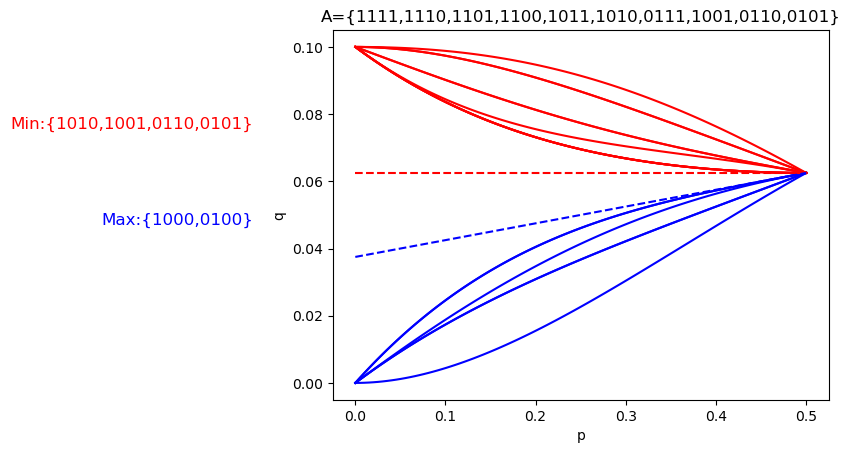

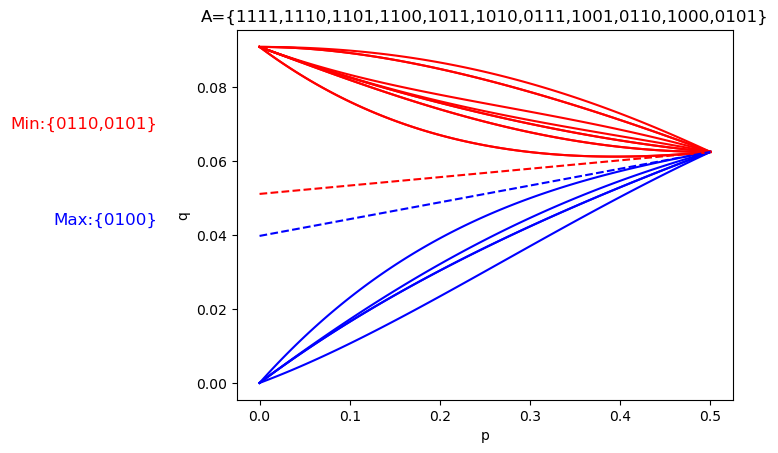

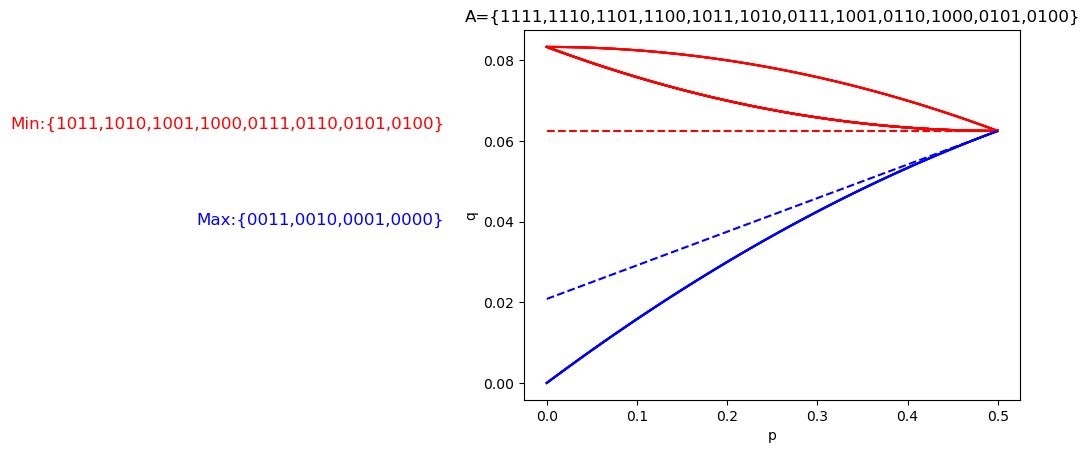

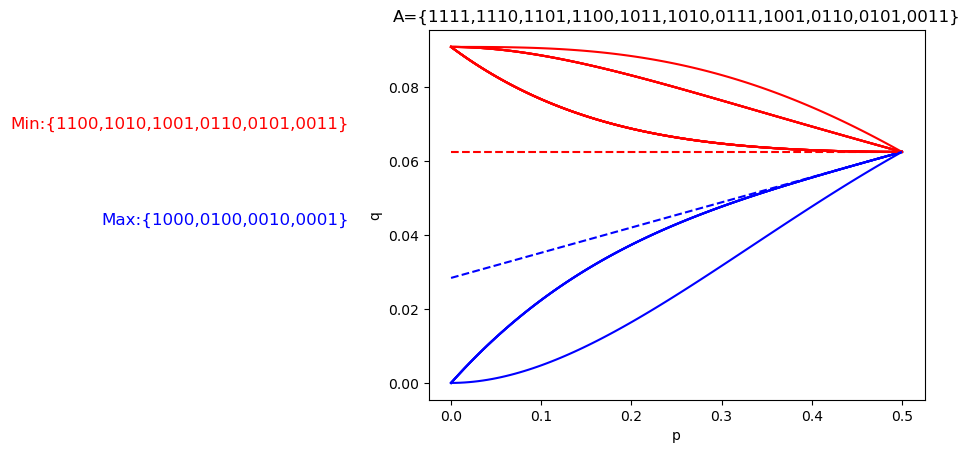

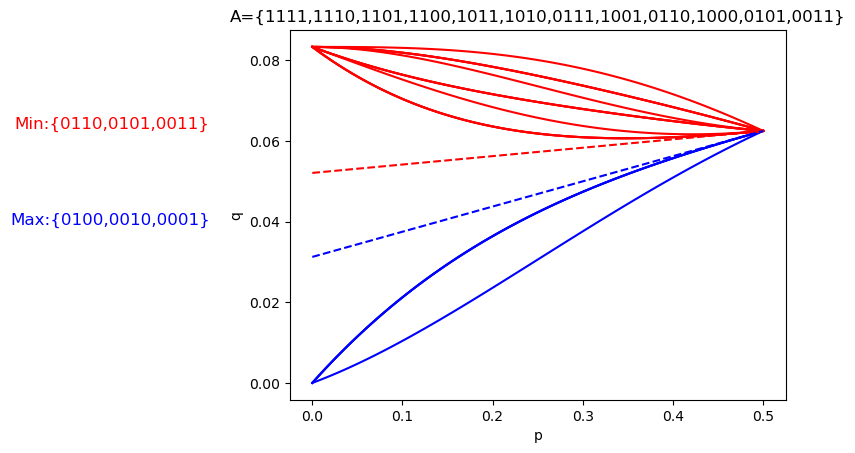

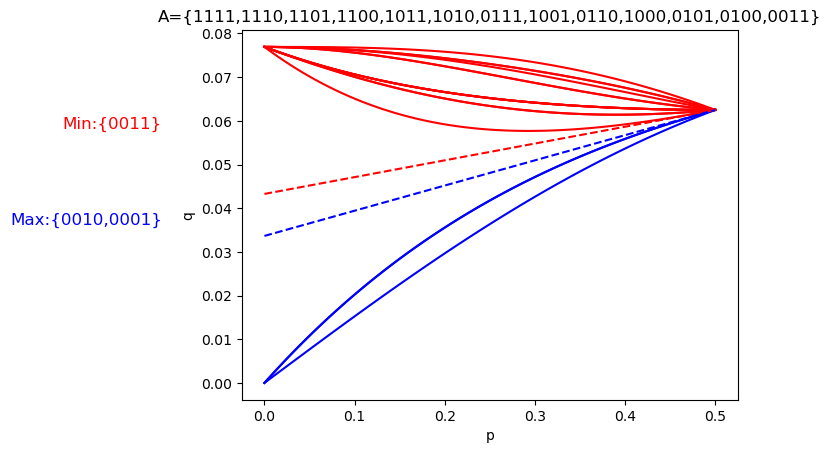

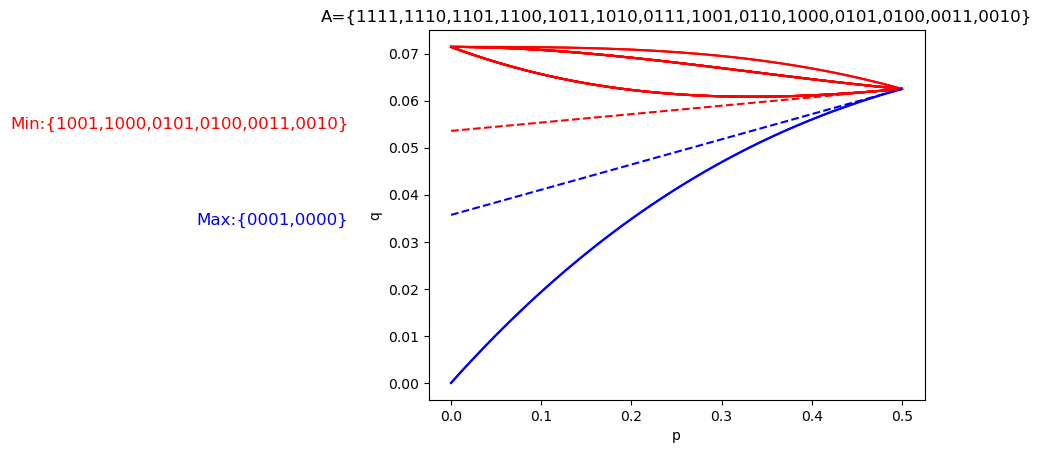

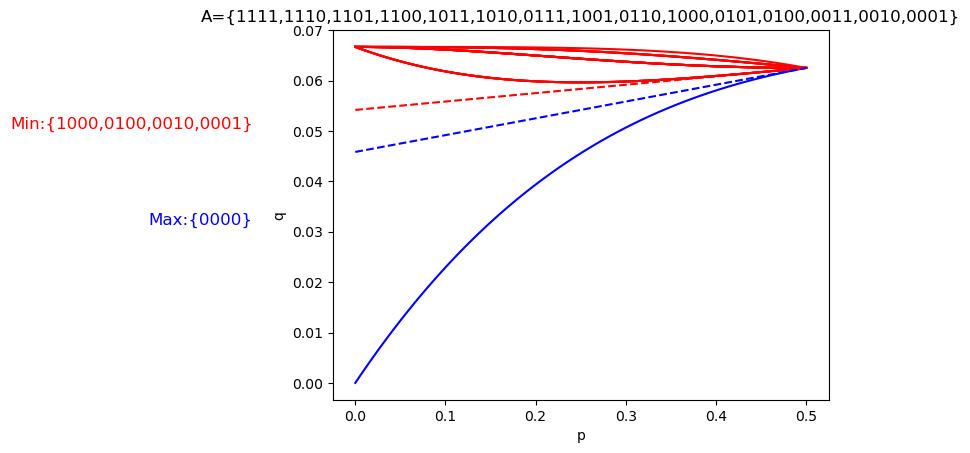

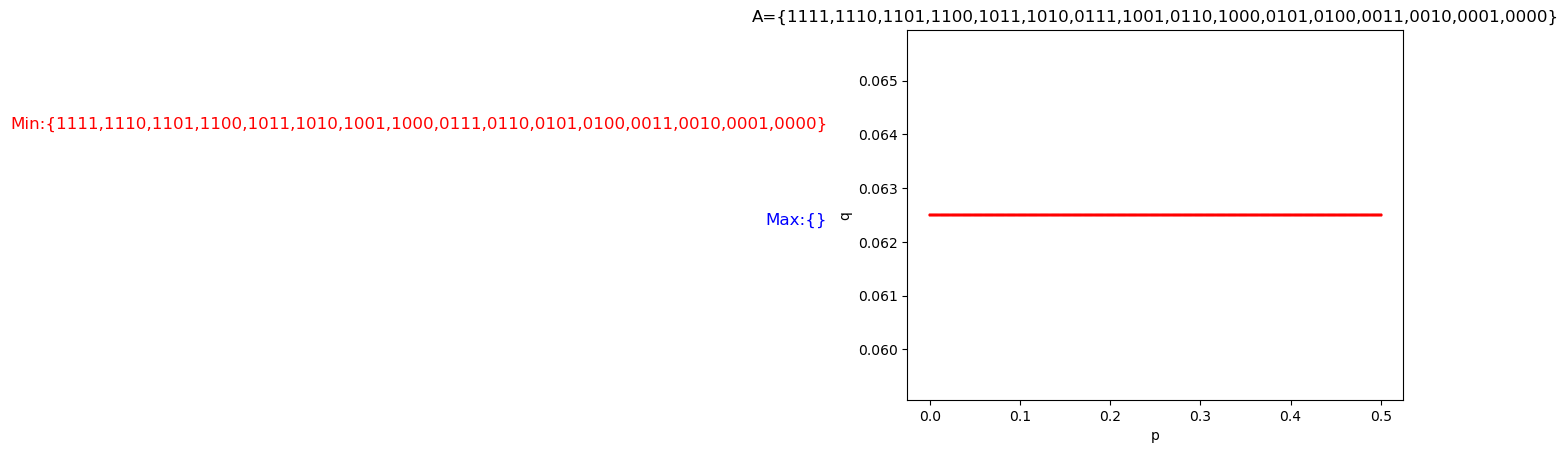

In [113]:
A = [
    np.array([[1,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1]]),   
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[0,1,1,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1]]),  
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0]]),  
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[1,0,0,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[0,1,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0]]), 
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1]]),
    np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[0,1,1,1],[1,0,0,1],[0,1,1,0],[1,0,0,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0]])
]
graph(4,A)